In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X = np.array(X)

y = data.emergency_or_not.values

In [5]:
X.shape

(2352, 224, 224, 3)

In [6]:
X = X / X.max()

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

In [8]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 15s 9ms/step - loss: 0.6906 - acc: 0.5954 - val_loss: 0.7022 - val_acc: 0.4873
Epoch 2/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6060 - acc: 0.6750 - val_loss: 0.6970 - val_acc: 0.4788
Epoch 3/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5768 - acc: 0.7041 - val_loss: 0.5593 - val_acc: 0.7040
Epoch 4/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5350 - acc: 0.7418 - val_loss: 0.5551 - val_acc: 0.7011
Epoch 5/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5012 - acc: 0.7740 - val_loss: 0.5189 - val_acc: 0.7351
Epoch 6/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4637 - acc: 0.7874 - val_loss: 0.5118 - val_acc: 0.7606
Epoch 7/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4564 - acc: 0.7971 - val_loss: 0.5026 - val_acc: 0.7380
Epoch 8/

In [12]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [14]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6658 - acc: 0.6057 - val_loss: 0.6713 - val_acc: 0.5623
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6260 - acc: 0.6604 - val_loss: 0.6785 - val_acc: 0.5864
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5970 - acc: 0.6877 - val_loss: 0.5717 - val_acc: 0.6969
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5683 - acc: 0.7132 - val_loss: 0.5600 - val_acc: 0.7139
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5478 - acc: 0.7375 - val_loss: 0.5472 - val_acc: 0.7394
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5262 - acc: 0.7503 - val_loss: 0.5290 - val_acc: 0.7507
Epoch 7/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.5073 - acc: 0.7667 - val_loss: 0.5216 - val_acc: 0.7351
Epoch 8/10
1646

There is 34 % chance that it is an emergency vehicle
whereas actual class is 0


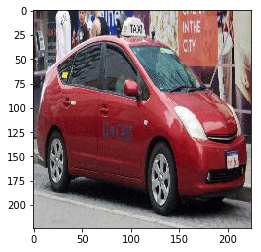

In [15]:
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

_, valid_vehicles, _, _ = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

index = rng.choice(range(len(valid_vehicles)))

img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', y_valid[index])

plt.imshow(img)

There is 56 % chance that it is an emergency vehicle
whereas actual class is 0


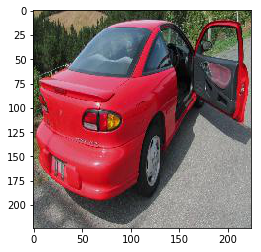

In [16]:
incorrect_indices = np.where(predictions != y_valid)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]

prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', y_valid[index])

plt.imshow(img)

In [17]:
# increase number of convolutional layers
# increase number of convolutional kernels
# change padding technique
# change stride

In [18]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=25, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=100, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1440100   
__________

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.7278 - acc: 0.5346 - val_loss: 0.6822 - val_acc: 0.5637
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6700 - acc: 0.5954 - val_loss: 0.6797 - val_acc: 0.5538
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6603 - acc: 0.6009 - val_loss: 0.6607 - val_acc: 0.5864
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6535 - acc: 0.6221 - val_loss: 0.6483 - val_acc: 0.6190
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6420 - acc: 0.6416 - val_loss: 0.6353 - val_acc: 0.6671
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6341 - acc: 0.6495 - val_loss: 0.6248 - val_acc: 0.6756
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6244 - acc: 0.6531 - val_loss: 0.6425 - val_acc: 0.6289
Epoch 8/10
1646

In [21]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 150)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 200)       750200    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 200)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               2880100   
__________

In [23]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 22s 13ms/step - loss: 0.6888 - acc: 0.5504 - val_loss: 0.6861 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6767 - acc: 0.5863 - val_loss: 0.6827 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6740 - acc: 0.5863 - val_loss: 0.6820 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6711 - acc: 0.5863 - val_loss: 0.6758 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6672 - acc: 0.5863 - val_loss: 0.6708 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6605 - acc: 0.5863 - val_loss: 0.6714 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6487 - acc: 0.6142 - val_loss: 0.6607 - val_acc: 0.5623
E

In [24]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 125)     9500      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 150)     468900    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 56, 56, 200)       750200    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 200)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 39200)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               3920100   
__________

In [26]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 24s 15ms/step - loss: 0.7012 - acc: 0.5401 - val_loss: 0.6875 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6762 - acc: 0.5826 - val_loss: 0.6823 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6702 - acc: 0.5857 - val_loss: 0.6731 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6647 - acc: 0.5923 - val_loss: 0.6700 - val_acc: 0.5623
Epoch 5/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6552 - acc: 0.6136 - val_loss: 0.6559 - val_acc: 0.5864
Epoch 6/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6452 - acc: 0.6294 - val_loss: 0.6333 - val_acc: 0.6558
Epoch 7/10
1646/1646 [==============================] - 20s 12ms/step - loss: 0.6363 - acc: 0.6543 - val_loss: 0.6418 - val_acc: 0.6190
E

In [27]:
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(filters=125, kernel_size=(5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(filters=150, kernel_size=(5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(filters=200, kernel_size=(5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 150)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 200)         750200    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 200)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
__________

In [29]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6922 - acc: 0.5547 - val_loss: 0.6856 - val_acc: 0.5609
Epoch 2/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6825 - acc: 0.5863 - val_loss: 0.6838 - val_acc: 0.5609
Epoch 3/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6743 - acc: 0.6021 - val_loss: 0.6784 - val_acc: 0.5609
Epoch 4/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6783 - acc: 0.5723 - val_loss: 0.6730 - val_acc: 0.5609
Epoch 5/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6415 - acc: 0.6385 - val_loss: 0.5900 - val_acc: 0.6983
Epoch 6/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5463 - acc: 0.7375 - val_loss: 0.5244 - val_acc: 0.7337
Epoch 7/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5287 - acc: 0.7406 - val_loss: 0.4998 - val_acc: 0.7465
Epoch 8/15
1646

![some](../notebooks/images/original_vgg_model.png)

In [30]:
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])